# Défi open data : Elections

Les résultats d’une élection sont souvent analysés à différentes échelles géographiques, et notamment à la commune. 

Depuis 2023, l’Insee met à disposition des données [reliant les adresses des électeurs à leur bureau de vote de rattachement](https://www.data.gouv.fr/fr/datasets/bureaux-de-vote-et-adresses-de-leurs-electeurs/), qui **ouvrent des possibilités d’analyses inédites**. Celles-ci peuvent être utilisées pour générer des contours de bureaux de vote, ce qui permet ensuite de croiser les données des élections du Ministère de l’intérieur et des Outre-mer avec d’autres informations (niveau de vie, âge, etc.) et d’**étudier les comportements électoraux à une échelle infra-communale**.

Avant la publication de ces données, des travaux à l'échelle du bureau de vote avaient déjà pu être menés en utilisant des données locales ou issues de projets de recherche (Cartelec).

**La problématique du défi**

Ce projet vous propose de **mettre en regard les résultats des élections avec les caractéristiques sociodémographiques des électeurs à différentes échelles géographiques et notamment au niveau infra-communal**.

Beaucoup de données ouvertes sont mises à disposition pour vous permettre de répondre à ce sujet. Plusieurs jeux de données ont déjà été chargés dans cet environnement ([cf. liste](https://defis.data.gouv.fr/defis/65b22219ffcf892bd066df76/)) et vous pouvez bien évidemment en ajouter d’autres selon vos besoins.

Une fois vos travaux terminés, partagez-les avec l’ensemble de la communauté [en publiant une réutilisation sur data.gouv.fr](https://guides.data.gouv.fr/guide-data.gouv.fr/reutilisations) !

## Exemple de réalisation : : évolution des taux d'abstention

In [1]:
import pandas as pd
import plotly.express as px
import kaleido

In [2]:
# import des données
resultats = pd.read_parquet(
    "https://www.data.gouv.fr/fr/datasets/r/ff16d511-10c0-405e-9b35-511723948fce"
)

In [3]:
# on choisit un type d'élections à analyser
mapping = {
    "pres": "présidentielles",
    "legi": "législatives",
    "regi": "régionnales",
    "euro": "européennes",
    "dpmt": "départementales",
    "cant": "cantonnales",
    "muni": "municipales",
}

election_type = "legi"
resultats_filtres = resultats.loc[resultats['id_election'].str.contains(election_type)]
resultats_filtres

,id_election,id_brut_miom,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Code de la circonscription,Libellé de la circonscription,Code du canton,Libellé du canton
69297,2017_legi_t1,01001_0001,01,Ain,001,L'Abergement-Clémenciat,0001,598,261,43.650002,...,0,0.00,0.00,337,56.349998,100.000000,04,4ème circonscription,None,None
69298,2017_legi_t1,01002_0001,01,Ain,002,L'Abergement-de-Varey,0001,211,79,37.439999,...,1,0.47,0.76,128,60.660000,96.970001,05,5ème circonscription,None,None
69299,2017_legi_t1,01004_0001,01,Ain,004,Ambérieu-en-Bugey,0001,1126,637,56.570000,...,3,0.27,0.61,476,42.270000,97.339996,05,5ème circonscription,None,None
69300,2017_legi_t1,01004_0002,01,Ain,004,Ambérieu-en-Bugey,0002,1134,579,51.060001,...,3,0.26,0.54,541,47.709999,97.480003,05,5ème circonscription,None,None
69301,2017_legi_t1,01004_0003,01,Ain,004,Ambérieu-en-Bugey,0003,1117,560,50.130001,...,3,0.27,0.54,548,49.060001,98.379997,05,5ème circonscription,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546946,2012_legi_t2,95680_0011,95,None,680,Villiers-le-Bel,0011,1223,766,62.630001,...,21,1.72,4.60,436,35.650002,95.400002,08,None,35,None
2546947,2012_legi_t2,95680_0012,95,None,680,Villiers-le-Bel,0012,950,524,55.160000,...,18,1.89,4.23,408,42.950001,95.769997,08,None,35,None
2546948,2012_legi_t2,95680_0013,95,None,680,Villiers-le-Bel,0013,658,418,63.529999,...,11,1.67,4.58,229,34.799999,95.419998,08,None,35,None
2546949,2012_legi_t2,95682_0001,95,None,682,Villiers-le-Sec,0001,95,24,25.260000,...,0,0.00,0.00,71,74.739998,100.000000,09,None,15,None


In [4]:
resultats_filtres['id_election'].value_counts()

2022_legi_t1    69682
2022_legi_t2    69355
2017_legi_t1    69242
2017_legi_t2    68767
2012_legi_t1    67932
2007_legi_t1    65618
2002_legi_t1    63394
2012_legi_t2    62633
2002_legi_t2    57575
2007_legi_t2    51779
Name: id_election, dtype: int64

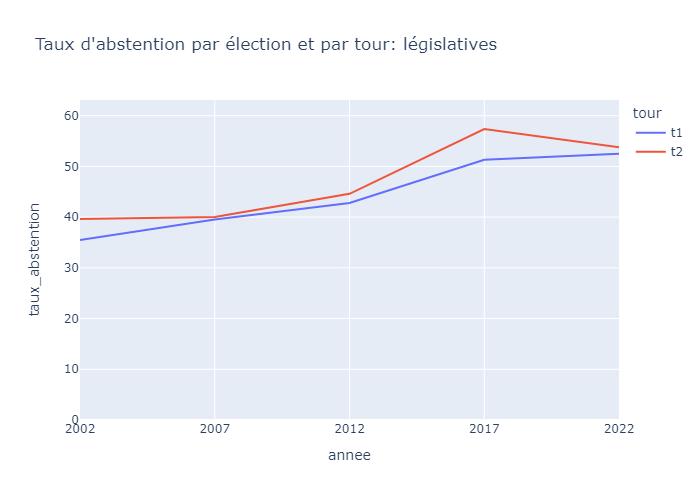

In [5]:
inscrits = resultats_filtres.groupby('id_election')['Inscrits'].sum()
abstenus = resultats_filtres.groupby('id_election')['Abstentions'].sum()
taux = (abstenus/inscrits*100).reset_index().rename({
    0: 'taux_abstention',
}, axis=1)
taux['tour'] = taux['id_election'].apply(lambda x: x.split('_')[-1])
taux['annee'] = taux['id_election'].apply(lambda x: x.split('_')[0])

fig = px.line(
    taux,
    x='annee',
    y='taux_abstention',
    color='tour',
    title=f"Taux d'abstention par élection et par tour: {mapping[election_type]}",
)
fig.update_layout(
    yaxis_range=(0, max(taux['taux_abstention'])*1.1)
)
# le paramètre renderer permet de garder l'image après fermeture du notebook mais il n'est plus interactible
fig.show(
#     renderer='png'
)